# Exploración de MOLEC 2024
Trabajo de análisis de datos

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import os


In [13]:
file='../data/raw/conjunto_de_datos/conjunto_de_datos_molec_2024_02.csv'
cols=['nivel','p3_1','p4','edad','p32','p34_4','p34_4_1','factor']
df=pd.read_csv(file,encoding='latin-1')[cols]
df.head()


,nivel,p3_1,p4,edad,p32,p34_4,p34_4_1,factor
0,3,2,0,52,5,1,1,36731
1,3,2,0,55,2,2,0,9183
2,3,2,0,59,3,1,1,36731
3,4,2,0,30,4,1,1,18365
4,3,2,0,54,0,1,1,7488


In [14]:
print('Filas y columnas:', df.shape)
print('Duplicados:', df.duplicated().sum())
print(df.isna().sum())
df_clean=df.drop_duplicates().copy()
output_path='../data/processed/molec_limpio.csv'
if not os.path.exists(output_path):
    df_clean.to_csv(output_path, index=False)
else:
    print(f"{output_path} already exists. Using existing file.")


Filas y columnas: (2016, 8)
Duplicados: 0
nivel      0
p3_1       0
p4         0
edad       0
p32        0
p34_4      0
p34_4_1    0
factor     0
dtype: int64
../data/processed/molec_limpio.csv already exists. Using existing file.


In [15]:
df_clean.dtypes

nivel      int64
p3_1       int64
p4         int64
edad       int64
p32        int64
p34_4      int64
p34_4_1    int64
factor     int64
dtype: object

In [16]:
desc=df_clean.describe()
desc

,nivel,p3_1,p4,edad,p32,p34_4,p34_4_1,factor
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,4.659722,1.552083,1.274802,46.491567,0.817460,1.427083,0.998016,21196.409226
std,4.183067,0.542273,3.262826,16.760965,1.424846,0.593296,1.274680,12139.702671
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,3576.000000
25%,3.000000,1.000000,0.000000,33.000000,0.000000,1.000000,0.000000,12994.000000
50%,4.000000,2.000000,0.000000,46.000000,0.000000,1.000000,1.000000,18445.000000
75%,7.000000,2.000000,2.000000,59.000000,1.000000,2.000000,1.000000,26838.750000
max,99.000000,2.000000,70.000000,94.000000,6.000000,3.000000,6.000000,124941.000000


In [17]:
quant=['p4','edad','p34_4_1','factor']
print({c:skew(df_clean[c]) for c in quant})
print({c:kurtosis(df_clean[c]) for c in quant})

{'p4': np.float64(9.384634865901742), 'edad': np.float64(0.26758112803569595), 'p34_4_1': np.float64(1.7078253171776545), 'factor': np.float64(1.7059010596908002)}
{'p4': np.float64(143.7078576533319), 'edad': np.float64(-0.8033028959433608), 'p34_4_1': np.float64(2.9188668405164124), 'factor': np.float64(5.824317780002344)}


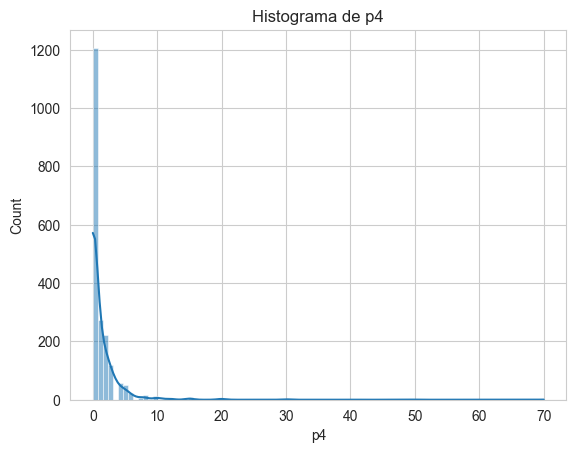

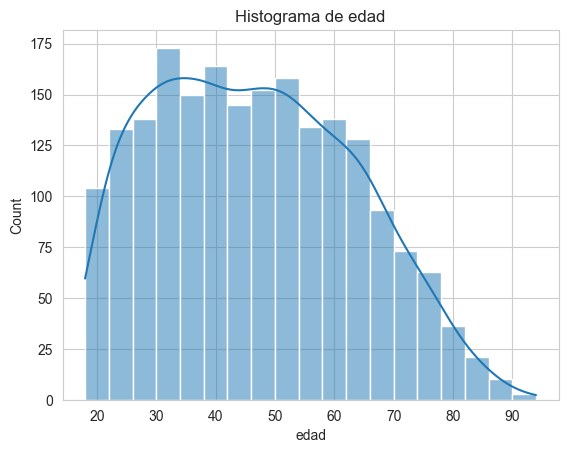

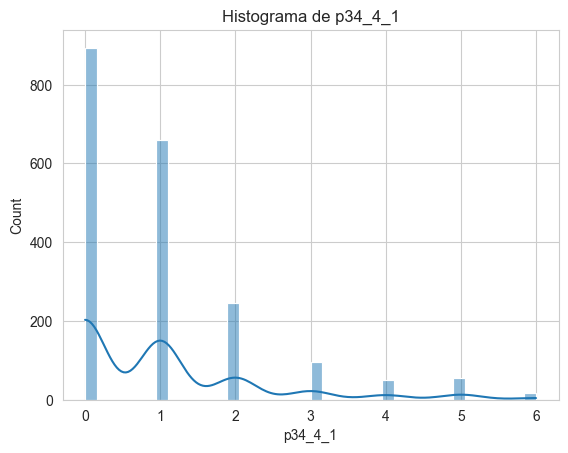

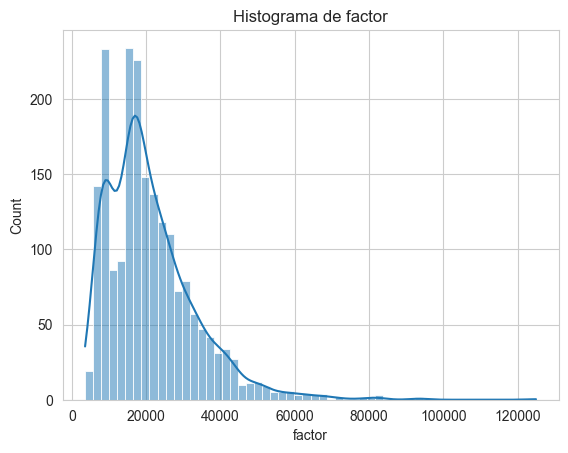

In [18]:
for c in ['p4','edad','p34_4_1','factor']:
    sns.histplot(df_clean[c], kde=True)
    plt.title(f'Histograma de {c}')
    plt.show()

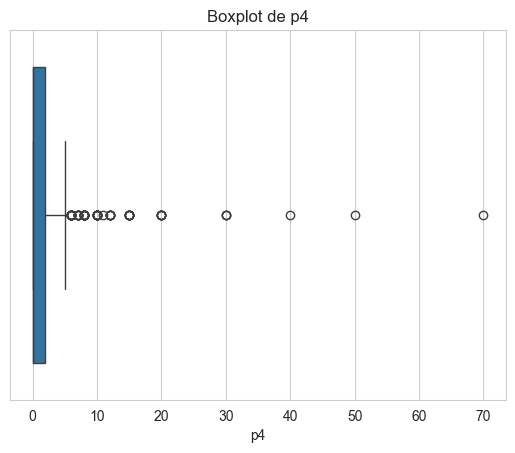

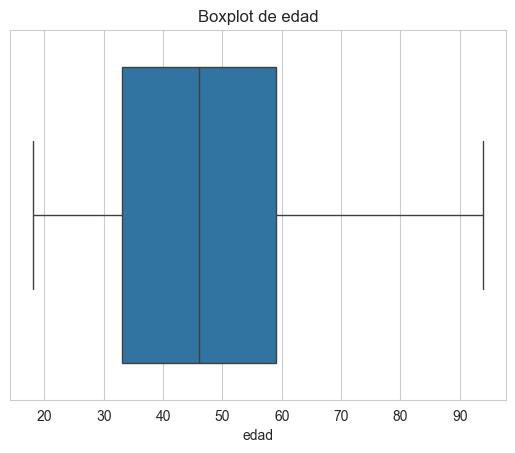

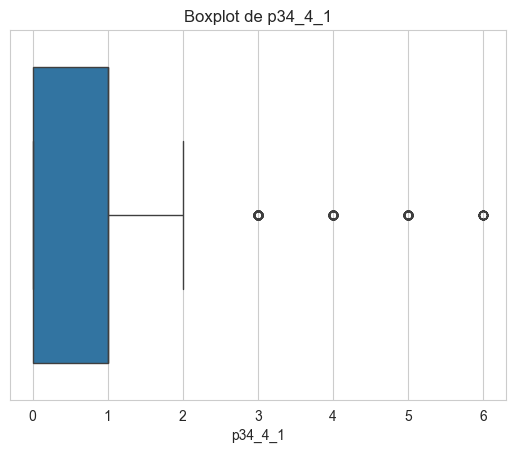

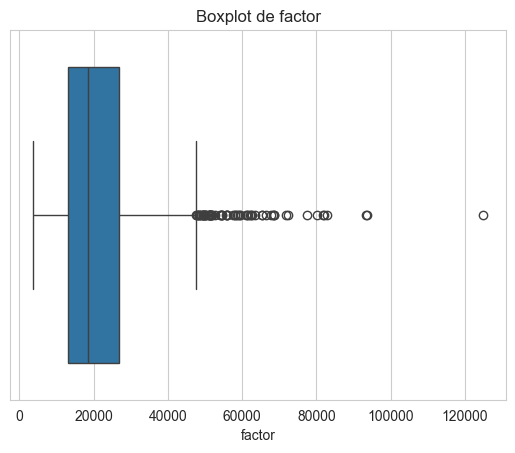

In [19]:
for c in ['p4','edad','p34_4_1','factor']:
    sns.boxplot(x=df_clean[c])
    plt.title(f'Boxplot de {c}')
    plt.show()

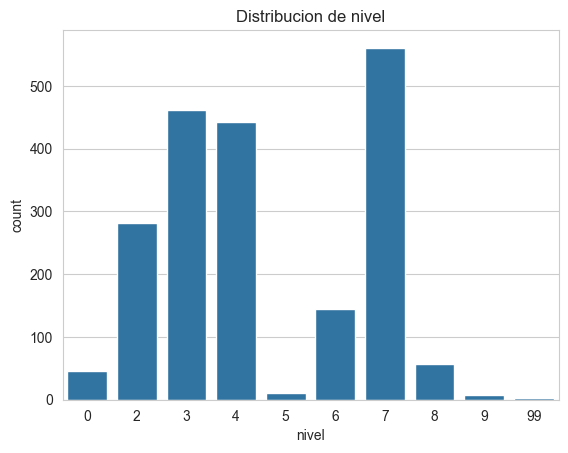

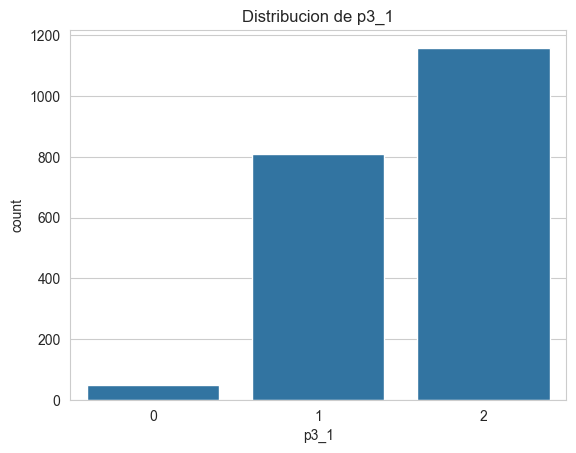

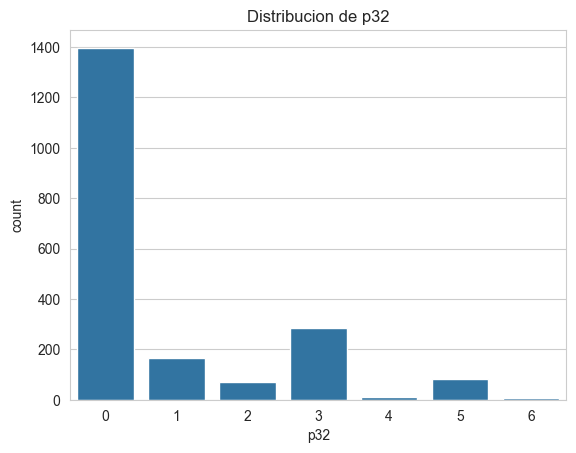

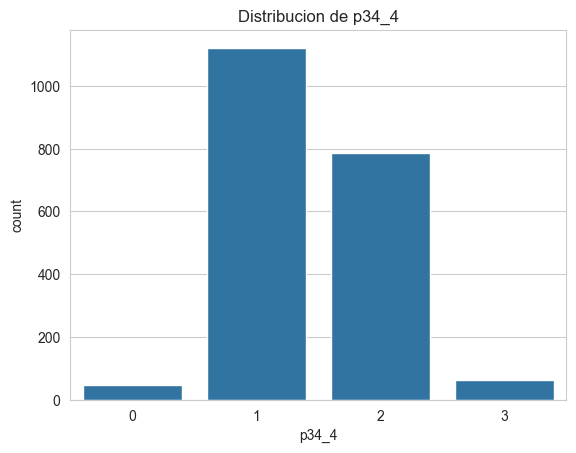

In [20]:
for c in ['nivel','p3_1','p32','p34_4']:
    sns.countplot(x=df_clean[c])
    plt.title(f'Distribucion de {c}')
    plt.show()

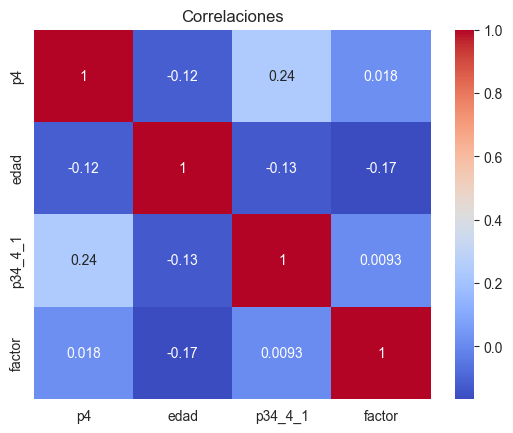

In [21]:
corr=df_clean[['p4','edad','p34_4_1','factor']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlaciones')
plt.show()


### Conclusiones
1. **Pregunta 1**: las personas con mayor nivel educativo tienden a reportar una mayor lectura de libros y promedian más títulos leídos.
2. **Pregunta 2**: las razones para no leer varían ligeramente con la edad; en edades avanzadas destaca la falta de tiempo.
3. **Pregunta 3**: haber crecido con libros en casa se relaciona positivamente con leer en la adultez.
